In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/processed.cleveland.data


# Here, I will be predicting heart disease using Decision Tree Algorithm

# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #This is needed to build plots
from sklearn.tree import DecisionTreeClassifier #This is needed to build classification tree
from sklearn.tree import plot_tree # to visualize classification tree
from sklearn.model_selection import train_test_split # split data into training and testing set
from sklearn.model_selection import cross_val_score  # for cross validation
from sklearn.metrics import confusion_matrix # to create confusion matrix (This helps to measure the accuracy of model)
from sklearn.metrics import plot_confusion_matrix # to visualize the confusion matrix


# Importing the Data

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease/processed.cleveland.data', header = None)

In [4]:
# Checking the dataset first 10 rows
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


**It will difficult to work with column indexs, let's add column names.** The column names are given in Attribute section : https://archive.ics.uci.edu/ml/datasets/heart+disease

In [5]:
df.columns = ['age','sex','cp','trestbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [6]:
# print the first 5 rows
df.head(5)

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**The DF looks good now.**

# Let's deal with Missing Values.

In [7]:
# Print the datatypes of all columns
df.dtypes

age        float64
sex        float64
cp         float64
trestbp    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

**Hmmm..there seems to be something wrong with 'ca' and 'thal' column**. Let's dig more

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**Some of the data is missing in 'ca' and 'thal' column**

Whenever there are missing values in data we either impute the values or remove the rows. The latter solution is easy but if there are so many rows with missing values then removing all the rows will result in small dataset for the training. Let's see how many rows contain the missing values.

In [10]:
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [11]:
len(df)

303

**I will remove the rows with the missing values because we would still have enough data to train model.**

In [12]:
df_notmiss = df[(df['ca'] != '?') & (df['thal'] != '?')]

In [13]:
len(df_notmiss)

297

Let's check values of ca and thal column to be double sure.

In [14]:
df_notmiss['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_notmiss['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
df_notmiss['restecg'].unique()

array([2., 0., 1.])

# Hurray!!!! We have dealt with missing data. Now, let's build classification tree.

First split the dataset into independent and dependent variables.

In [17]:
X = df_notmiss.drop('hd',axis = 1).copy()
X.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
y = df_notmiss['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

**We need to take care of Categorical data.**

In [19]:
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,trestbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


We will now convert the y dataset into binary dataset.

In [20]:
y.unique()

array([0, 2, 1, 3, 4])

In [21]:
y_not_zero_index = y>0
y[y_not_zero_index] = 1
y.unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([0, 1])

**Let's start building tree**

In [22]:
# First we will need to split the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state = 42) # use the same random state to get same split

In [23]:
# Create a decision tree and fit it to the training data
root_dt = DecisionTreeClassifier(random_state = 42)
root_dt = root_dt.fit(X_train,y_train) # We call it a preliminary tree becauase it's not optimised


[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'trestbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0

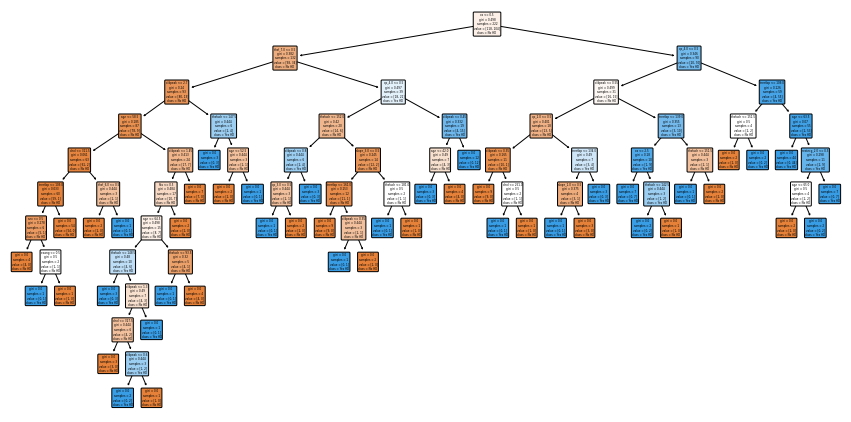

In [24]:
# We will plot the tree now
plt.figure(figsize = (15,7.5))
plot_tree(root_dt,
         filled = True,
         rounded = True,
         class_names = ['No HD','Yes HD'],
         feature_names = X_encoded.columns)

**Let's check the accuracy of tree.**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


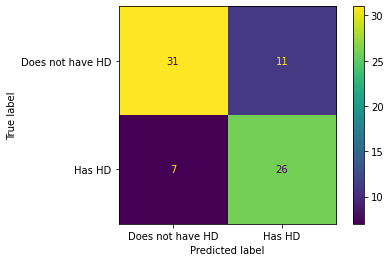

In [25]:
# Confusion Matrix

plot_confusion_matrix(root_dt,X_test,y_test,display_labels = ['Does not have HD','Has HD'])

The confusion matrix shows that out of all those who have been predicted "Does not have HD" infact includes **7** people who does have HD. Also, **11** people who doesn't have "HD" but they have been predicted "Has HD". One of reason behind the misclassification is **overfit**. So, let's **prune** the tree.

**Cost Complexity Pruning**

In [26]:
path = root_dt.cost_complexity_pruning_path(X_train,y_train) # determines the value of alpha
ccp_alphas = path.ccp_alphas # extract different values of alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value of alpha because it will prune all the leaves, leaving us with the root node only.

clf_dts = [] # create an array that we will put the decision trees into

## Now, we will create one decision tree per value for alpha and store it in array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the **Training Dataset** and **Testing Dataset** as a function of alpha.

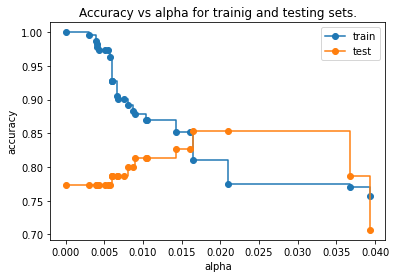

In [27]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts ]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for trainig and testing sets.')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()


By eyeballing, I select alpha = 0.016

Since there are many ways to divide the training and testing datasets, how do we know that we have used the best **training** and best **testing** datatset..that's why we'll gonna use **Cross-Validation**.

**Cross_Validation for Finding the Best Alpha**

The value of alpha is data sensitive, so we use different set of data we will get different alpha.

*First, we will demonstrate that using different training and testing dataset with same **alpha** will result in different accuracy, proving that **alpha** is sensitive to the datasets. *

<AxesSubplot:xlabel='tree'>

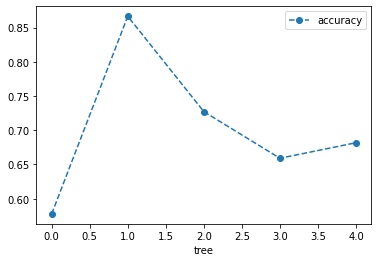

In [28]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)  # create the tree with ccp_alpha = 0.016

## now we'll use 5-fold cross validation create 5 different training and testing datasets that
## are then used to train and test the tree
## NOTE : We use 5-fold because we don't have tonns of data......

scores = cross_val_score(root_dt, X_train,y_train)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x = 'tree',y= 'accuracy',marker ='o',linestyle = '--')


*The graph shows that using different Training and Testing data with same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets.So, instead of picking up single **Training** and **Testing** dataset, we'll use cross-validation to find the optimal value for ccp_alpha. *

<AxesSubplot:xlabel='alpha'>

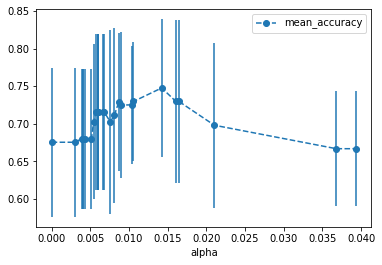

In [29]:
## create an array to store the results of each fold during cross validation
alpha_loop_values = []

## For each candidate value for alpha, we will run the 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values......
for ccp_alpha in ccp_alphas:
    clf_df = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_df, X_train, y_train, cv =5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha','mean_accuracy','std'])


alpha_results.plot(x = 'alpha',
                  y = 'mean_accuracy',
                  yerr = 'std',
                  marker = 'o',
                  linestyle = '--')

Using cross validation, we can see that, over all, instead of setting ccp_alpha = 0.016, we need to set it to something closer to 0.014. We can find the exact value with:

In [30]:
alpha_results[(alpha_results['alpha'] > 0.014)
             & 
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [31]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                               & 
                               (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

*At this point Python thinks that ideal_ccp_alpha is a series, which is a type of array. We can tell because when we printed **ideal_ccp_alpha** out, we got two bits of stuff. The first one was **20**, which is the index in the series, the second one, 0.014225, is the value we want.So we can convert this form a series to a float with the following command:*

In [32]:
# convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

**Hoorray!!! Now we have the ideal value for alpha and we can build, evaluate and draw the final Classification Tree.**

# Building, Evaluating, Drawing and Interpreting the Final Classification Tree.

*Now that we have the ideal value for alpha we can build the final Classification Tree by setting ccp_alpha = ideal_ccp_alpha :*

In [33]:
## Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

*Now let's draw another confusion matrix to see if the pruned tree does better.*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


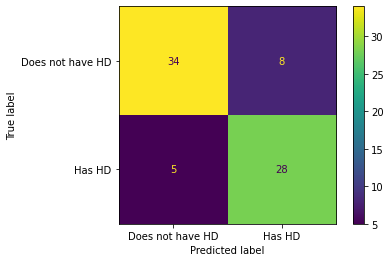

In [34]:
plot_confusion_matrix(clf_dt_pruned, 
                     X_test,
                     y_test,
                     display_labels = ["Does not have HD","Has HD"])

**Horray!!!** We can see that the pruned tree is better at classifying patients than the full sized tree.

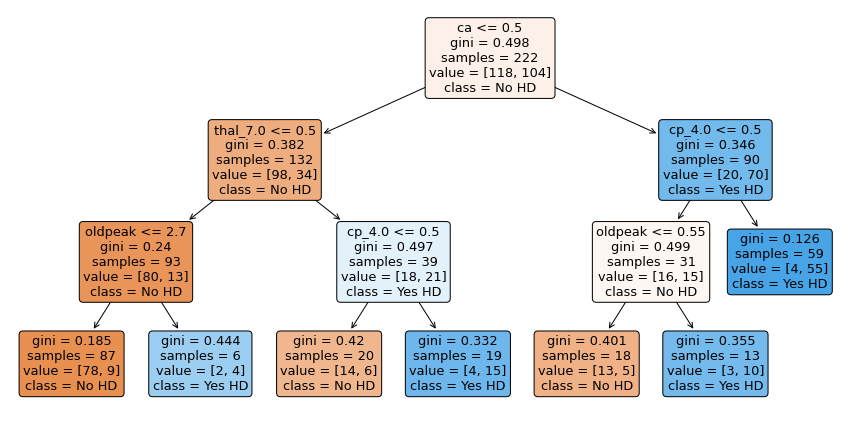

In [35]:
# The Last thing we are going to do is draw the pruned tree and interpret it.
plt.figure(figsize = (15,7.5))
plot_tree(clf_dt_pruned, 
         filled = True,
         rounded = True,
         class_names = ["No HD","Yes HD"],
         feature_names = X_encoded.columns);

> My Inspiration :
* https://www.youtube.com/watch?v=_L39rN6gz7Y
* https://www.youtube.com/watch?v=q90UDEgYqeI